## Loading final_dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/aniReco/Dataset')

In [4]:
!ls

anime_cleaned.csv	 final_cleaned_model_ready.csv	     UserList.csv
anime_filtered.csv	 final_cleaned_model_ready_ver2.csv  users_cleaned.csv
AnimeList.csv		 name_id_mapping.pickle		     users_filtered.csv
animelists_cleaned.csv	 output_dataset
animelists_filtered.csv  UserAnimeList.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
plt.rcParams["figure.figsize"] = (50,50)

In [7]:
anime_df = pd.read_csv('final_cleaned_model_ready.csv')
anime_df.head()

,anime_id,type,source,episodes,status,airing,rating,score,scored_by,rank,popularity,members,favorites,studio,duration_min,aired_from_year,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Fantasy,Kids,Action,Music,SliceofLife,Josei,Harem,ShounenAi,Adventure,SuperPower,Sci-Fi,Ecchi,Seinen,MartialArts,Game,Sports,Demons,Historical,Horror,Mystery,Psychological,Vampire,Mecha,Military,Space,Samurai,Thriller,Hentai,Yaoi,ShoujoAi,Police,Cars,Dementia,Yuri,unknown,days
0,11013,5,6,12,1,0,3,7.63,139250,1274.0,231,283882,2809,139,24.0,2012.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.0
1,2104,5,6,26,1,0,3,7.89,91206,727.0,366,204003,2579,207,24.0,2007.0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182.0
2,5262,5,6,51,1,0,2,7.55,37129,1508.0,1173,70127,802,470,24.0,2008.0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,356.0
3,721,5,9,38,1,0,3,8.21,36501,307.0,916,93312,3344,225,16.0,2002.0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,280.0
4,12365,5,6,25,1,0,3,8.67,107767,50.0,426,182765,2082,250,24.0,2012.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175.0


## Some minor imputations


In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   type             6668 non-null   int64  
 2   source           6668 non-null   int64  
 3   episodes         6668 non-null   int64  
 4   status           6668 non-null   int64  
 5   airing           6668 non-null   int64  
 6   rating           6668 non-null   int64  
 7   score            6668 non-null   float64
 8   scored_by        6668 non-null   int64  
 9   rank             6312 non-null   float64
 10  popularity       6668 non-null   int64  
 11  members          6668 non-null   int64  
 12  favorites        6668 non-null   int64  
 13  studio           6668 non-null   int64  
 14  duration_min     6668 non-null   float64
 15  aired_from_year  6668 non-null   float64
 16  Comedy           6668 non-null   int64  
 17  Supernatural  

In [ ]:
anime_df.describe()

,anime_id,type,source,episodes,status,airing,rating,score,scored_by,rank,popularity,members,favorites,studio,duration_min,aired_from_year,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Fantasy,Kids,Action,Music,SliceofLife,Josei,Harem,ShounenAi,Adventure,SuperPower,Sci-Fi,Ecchi,Seinen,MartialArts,Game,Sports,Demons,Historical,Horror,Mystery,Psychological,Vampire,Mecha,Military,Space,Samurai,Thriller,Hentai,Yaoi,ShoujoAi,Police,Cars,Dementia,Yuri,unknown,days
count,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.00000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.0000,6668.000000,6668.000000
mean,15064.977804,3.534043,7.240102,14.276395,0.972555,0.027445,2.864427,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,386.024445,28.442167,2006.915267,0.453059,0.128974,0.176515,0.177265,0.040042,0.150570,0.090582,0.065987,0.200660,0.216107,0.060888,0.307588,0.049340,0.139022,0.010048,0.041392,0.008248,0.203209,0.055039,0.197660,0.075885,0.070486,0.028944,0.025195,0.05069,0.033443,0.063737,0.034043,0.068086,0.030894,0.014997,0.081434,0.046791,0.037043,0.015297,0.011848,0.049640,0.004199,0.008398,0.023245,0.006149,0.007049,0.0015,0.000600,143.685363
std,13161.364001,1.728508,2.821966,40.906929,0.163387,0.163387,1.554830,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,209.758225,25.365980,10.381425,0.497829,0.335197,0.381286,0.381921,0.196072,0.357656,0.287035,0.248278,0.400524,0.411619,0.239142,0.461530,0.216593,0.345996,0.099742,0.199209,0.090452,0.402417,0.228073,0.398264,0.264834,0.255983,0.167662,0.156729,0.21938,0.179805,0.244303,0.181354,0.251913,0.173043,0.121550,0.273521,0.211206,0.188880,0.122740,0.108208,0.217217,0.064670,0.091264,0.150693,0.078179,0.083666,0.0387,0.024487,334.248074
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,0.000000,1942.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,2592.000000,3.000000,6.000000,1.000000,1.000000,0.000000,3.000000,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,207.000000,17.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,10401.500000,4.000000,6.000000,6.000000,1.000000,0.000000,3.000000,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,417.000000,24.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
print(type(anime_df['rank'][6663]))
print(anime_df['rank'][6663])

<class 'numpy.float64'>
9.52


In [ ]:
print(anime_df['score'][6663])

9.52


In [ ]:
scores_req = []
for i in range(anime_df.shape[0]):
    # print(anime_df['rank'][i])
    if anime_df['rank'][i]==:
        print(anime_df['rank'][i])
        scores_req.append(anime_df['score'][i])
print(scores_req)

[]


In [ ]:
anime_df[anime_df.isnull().any(axis=1)]

,anime_id,type,source,episodes,status,airing,rating,score,scored_by,rank,popularity,members,favorites,studio,duration_min,aired_from_year,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Fantasy,Kids,Action,Music,SliceofLife,Josei,Harem,ShounenAi,Adventure,SuperPower,Sci-Fi,Ecchi,Seinen,MartialArts,Game,Sports,Demons,Historical,Horror,Mystery,Psychological,Vampire,Mecha,Military,Space,Samurai,Thriller,Hentai,Yaoi,ShoujoAi,Police,Cars,Dementia,Yuri,unknown,days
72,9721,3,13,1,1,0,6,6.54,2749,NaN,4398,6450,39,183,22.0,2010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
75,747,3,6,2,1,0,5,6.93,10761,NaN,2808,17989,92,666,30.0,2005.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,57.0
85,36755,3,6,1,1,0,6,6.49,682,NaN,7015,1872,6,372,16.0,2017.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
108,11827,3,13,4,1,0,6,7.56,6748,NaN,3031,15385,437,331,30.0,2012.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,735.0
119,24641,3,13,1,1,0,6,7.50,6175,NaN,3193,14009,225,480,33.0,2014.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,19857,3,13,1,1,0,6,6.44,1103,NaN,5897,3085,19,480,25.0,2013.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
6581,5054,3,6,2,1,0,6,6.74,828,NaN,6144,2784,11,175,30.0,2008.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,32.0
6602,3050,3,9,2,1,0,6,6.52,2701,NaN,4553,5970,30,75,30.0,2004.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,91.0
6619,13595,3,6,2,1,0,6,7.02,2808,NaN,4319,6732,67,372,30.0,2012.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,91.0


In [ ]:
scores_req = anime_df.loc[anime_df['rank'].isnull(), 'score'].values
print(scores_req)

[6.54 6.93 6.49 7.56 7.5  6.85 6.72 7.04 7.53 6.3  6.51 6.48 6.74 6.84
 6.54 6.73 6.78 6.01 5.66 5.8  6.5  6.26 7.04 7.18 6.04 7.37 6.42 7.32
 6.19 6.94 7.29 5.92 6.8  5.41 6.26 6.88 5.31 5.97 6.48 6.21 6.31 6.06
 6.23 6.34 7.43 7.7  7.3  6.54 5.44 7.26 6.38 7.7  7.44 6.85 6.54 5.66
 7.33 7.2  6.72 7.44 7.06 6.59 6.94 6.58 7.26 7.36 7.2  6.2  6.86 5.97
 7.31 6.36 6.83 6.46 6.12 6.35 7.37 6.99 5.25 6.18 6.59 6.19 5.02 6.72
 5.72 7.07 5.93 6.11 7.88 6.59 6.9  7.35 7.64 7.44 6.92 6.98 7.04 6.02
 6.   6.14 7.21 6.42 6.38 4.97 6.91 6.17 5.07 5.98 6.37 5.89 6.7  6.86
 6.91 6.95 5.84 6.7  5.96 7.51 6.69 6.85 6.02 6.22 6.32 7.15 6.16 6.57
 5.58 5.88 6.36 6.41 6.59 5.9  6.19 6.22 6.59 7.08 5.81 6.26 6.42 5.57
 5.95 6.22 6.65 6.92 6.35 7.17 6.71 7.41 6.49 6.65 6.91 6.5  6.65 7.08
 6.3  7.23 7.09 6.88 6.81 6.58 6.57 6.35 7.42 6.82 6.8  6.47 6.55 5.97
 6.64 6.06 6.86 6.98 7.58 5.63 7.04 5.55 7.31 6.99 5.97 6.75 7.06 6.95
 5.9  7.58 6.13 6.15 7.28 6.62 6.85 6.18 6.21 6.56 7.07 6.85 7.04 6.44
 6.84 

In [ ]:
anime_df.loc[anime_df['score'].isin(scores_req), 'rank']

6        2594.0
15       1546.0
26       1108.0
30       3193.0
36       1233.0
         ...   
6654    11127.0
6655    12485.0
6657     7261.0
6662    11126.0
6663        NaN
Name: rank, Length: 4169, dtype: float64

In [ ]:
anime_df['score'].value_counts()

7.35    47
6.57    44
6.71    44
7.22    43
6.83    43
        ..
3.73     1
3.19     1
4.19     1
5.39     1
8.92     1
Name: score, Length: 509, dtype: int64

In [ ]:
last_rank = max(anime_df['rank'])

In [ ]:
anime_df.loc[anime_df['rank'].isnull(), 'rank'] = last_rank + 1

In [ ]:
anime_df.head(10)

,anime_id,type,source,episodes,status,airing,rating,score,scored_by,rank,popularity,members,favorites,studio,duration_min,aired_from_year,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Fantasy,Kids,Action,Music,SliceofLife,Josei,Harem,ShounenAi,Adventure,SuperPower,Sci-Fi,Ecchi,Seinen,MartialArts,Game,Sports,Demons,Historical,Horror,Mystery,Psychological,Vampire,Mecha,Military,Space,Samurai,Thriller,Hentai,Yaoi,ShoujoAi,Police,Cars,Dementia,Yuri,unknown,days
0,11013,5,6,12,1,0,3,7.63,139250,1274.0,231,283882,2809,139,24.0,2012.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.0
1,2104,5,6,26,1,0,3,7.89,91206,727.0,366,204003,2579,207,24.0,2007.0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182.0
2,5262,5,6,51,1,0,2,7.55,37129,1508.0,1173,70127,802,470,24.0,2008.0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,356.0
3,721,5,9,38,1,0,3,8.21,36501,307.0,916,93312,3344,225,16.0,2002.0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,280.0
4,12365,5,6,25,1,0,3,8.67,107767,50.0,426,182765,2082,250,24.0,2012.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175.0
5,6586,5,6,50,1,0,0,8.03,21618,526.0,1630,45625,826,578,24.0,2009.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,357.0
6,178,5,6,26,1,0,0,7.26,9663,2594.0,2490,22778,122,446,24.0,2003.0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175.0
7,2787,5,5,24,1,0,3,7.72,126085,1066.0,332,220591,1075,250,24.0,2007.0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175.0
8,4477,5,6,11,1,0,3,8.24,53908,281.0,988,85660,282,250,23.0,2008.0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70.0
9,853,5,6,26,1,0,3,8.34,335137,205.0,69,538843,24072,94,23.0,2006.0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175.0


In [ ]:
print(anime_df['rank'][6663])

12857.0


In [ ]:
anime_df['rank'].value_counts()

12857.0    356
3012.0       4
5317.0       4
5573.0       3
2350.0       3
          ... 
11432.0      1
2562.0       1
2633.0       1
7468.0       1
50.0         1
Name: rank, Length: 5435, dtype: int64

In [ ]:
anime_df.to_csv("final_cleaned_model_ready_ver2.csv", index = False)

## Exploratory analysis

In [8]:
anime_df = pd.read_csv('final_cleaned_model_ready_ver2.csv')
anime_df.head()

,anime_id,type,source,episodes,status,airing,rating,score,scored_by,rank,popularity,members,favorites,studio,duration_min,aired_from_year,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Fantasy,Kids,Action,Music,SliceofLife,Josei,Harem,ShounenAi,Adventure,SuperPower,Sci-Fi,Ecchi,Seinen,MartialArts,Game,Sports,Demons,Historical,Horror,Mystery,Psychological,Vampire,Mecha,Military,Space,Samurai,Thriller,Hentai,Yaoi,ShoujoAi,Police,Cars,Dementia,Yuri,unknown,days
0,11013,5,6,12,1,0,3,7.63,139250,1022.0,216,283882,2809,139,24.0,2012.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.0
1,2104,5,6,26,1,0,3,7.89,91206,610.0,332,204003,2579,207,24.0,2007.0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182.0
2,5262,5,6,51,1,0,2,7.55,37129,1179.0,1017,70127,802,470,24.0,2008.0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,356.0
3,721,5,9,38,1,0,3,8.21,36501,281.0,801,93312,3344,225,16.0,2002.0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,280.0
4,12365,5,6,25,1,0,3,8.67,107767,49.0,388,182765,2082,250,24.0,2012.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175.0


In [9]:
for col in anime_df.columns:
    print("col-name: ", col, " | no_of_unique_values: ", anime_df[col].nunique(dropna=True))

col-name:  anime_id  | no_of_unique_values:  6668
col-name:  type  | no_of_unique_values:  6
col-name:  source  | no_of_unique_values:  15
col-name:  episodes  | no_of_unique_values:  161
col-name:  status  | no_of_unique_values:  2
col-name:  airing  | no_of_unique_values:  2
col-name:  rating  | no_of_unique_values:  7
col-name:  score  | no_of_unique_values:  509
col-name:  scored_by  | no_of_unique_values:  5035
col-name:  rank  | no_of_unique_values:  5435
col-name:  popularity  | no_of_unique_values:  5857
col-name:  members  | no_of_unique_values:  5861
col-name:  favorites  | no_of_unique_values:  1225
col-name:  studio  | no_of_unique_values:  711
col-name:  duration_min  | no_of_unique_values:  175
col-name:  aired_from_year  | no_of_unique_values:  66
col-name:  Comedy  | no_of_unique_values:  2
col-name:  Supernatural  | no_of_unique_values:  2
col-name:  Romance  | no_of_unique_values:  2
col-name:  Shounen  | no_of_unique_values:  2
col-name:  Parody  | no_of_unique_value

In [ ]:
anime_df.describe()

,anime_id,type,source,episodes,status,airing,rating,score,scored_by,rank,popularity,members,favorites,studio,duration_min,aired_from_year,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Fantasy,Kids,Action,Music,SliceofLife,Josei,Harem,ShounenAi,Adventure,SuperPower,Sci-Fi,Ecchi,Seinen,MartialArts,Game,Sports,Demons,Historical,Horror,Mystery,Psychological,Vampire,Mecha,Military,Space,Samurai,Thriller,Hentai,Yaoi,ShoujoAi,Police,Cars,Dementia,Yuri,unknown,days
count,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.00000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.0000,6668.000000,6668.000000
mean,15064.977804,3.534043,7.240102,14.276395,0.972555,0.027445,2.864427,6.848998,2.403501e+04,2793.074385,2875.775495,4.749037e+04,670.365627,386.024445,28.442167,2006.915267,0.453059,0.128974,0.176515,0.177265,0.040042,0.150570,0.090582,0.065987,0.200660,0.216107,0.060888,0.307588,0.049340,0.139022,0.010048,0.041392,0.008248,0.203209,0.055039,0.197660,0.075885,0.070486,0.028944,0.025195,0.05069,0.033443,0.063737,0.034043,0.068086,0.030894,0.014997,0.081434,0.046791,0.037043,0.015297,0.011848,0.049640,0.004199,0.008398,0.023245,0.006149,0.007049,0.0015,0.000600,143.685363
std,13161.364001,1.728508,2.821966,40.906929,0.163387,0.163387,1.554830,0.927448,6.112103e+04,1625.149059,1665.133151,1.051211e+05,3823.072834,209.758225,25.365980,10.381425,0.497829,0.335197,0.381286,0.381921,0.196072,0.357656,0.287035,0.248278,0.400524,0.411619,0.239142,0.461530,0.216593,0.345996,0.099742,0.199209,0.090452,0.402417,0.228073,0.398264,0.264834,0.255983,0.167662,0.156729,0.21938,0.179805,0.244303,0.181354,0.251913,0.173043,0.121550,0.273521,0.211206,0.188880,0.122740,0.108208,0.217217,0.064670,0.091264,0.150693,0.078179,0.083666,0.0387,0.024487,334.248074
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,0.000000,1942.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,2592.000000,3.000000,6.000000,1.000000,1.000000,0.000000,3.000000,6.350000,6.812500e+02,1391.750000,1446.750000,2.222750e+03,3.000000,207.000000,17.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,10401.500000,4.000000,6.000000,6.000000,1.000000,0.000000,3.000000,6.930000,3.966000e+03,2746.000000,2842.500000,1.033650e+04,21.000000,417.000000,24.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
anime_df.isna().sum()

anime_id    0
type        0
source      0
episodes    0
status      0
           ..
Cars        0
Dementia    0
Yuri        0
unknown     0
days        0
Length: 61, dtype: int64

In [ ]:
anime_df.shape

(6668, 61)

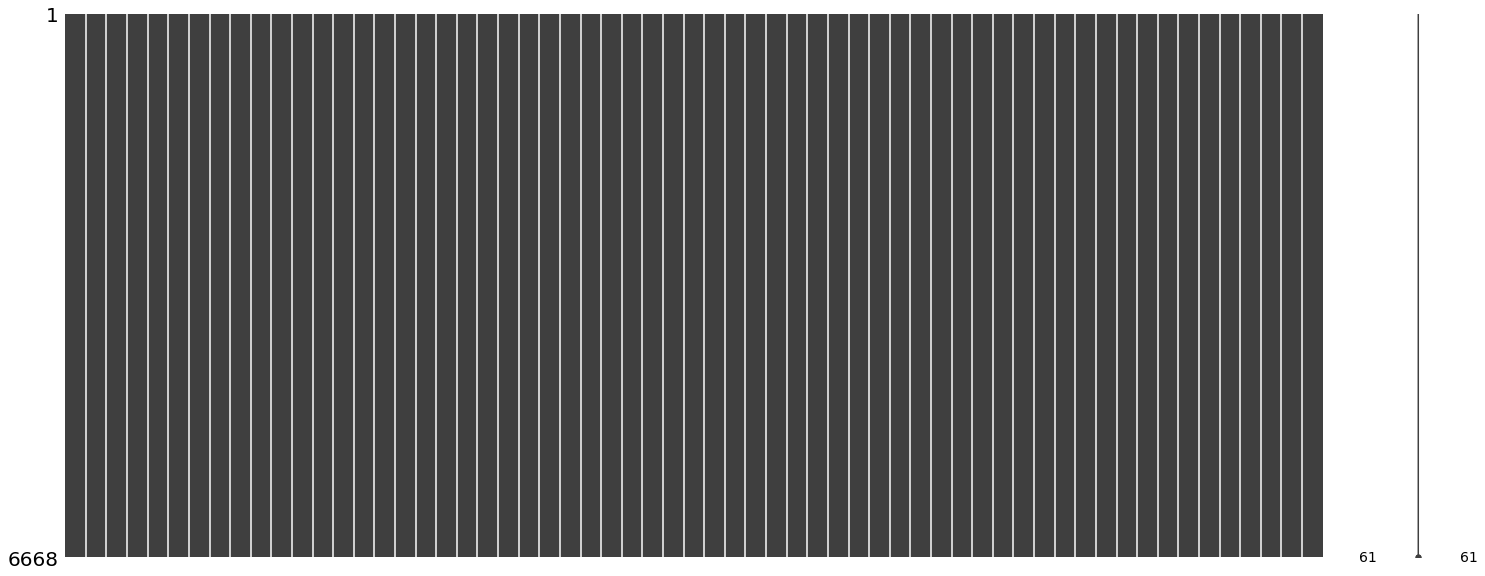

In [ ]:
import missingno as msno
msno.matrix(anime_df)

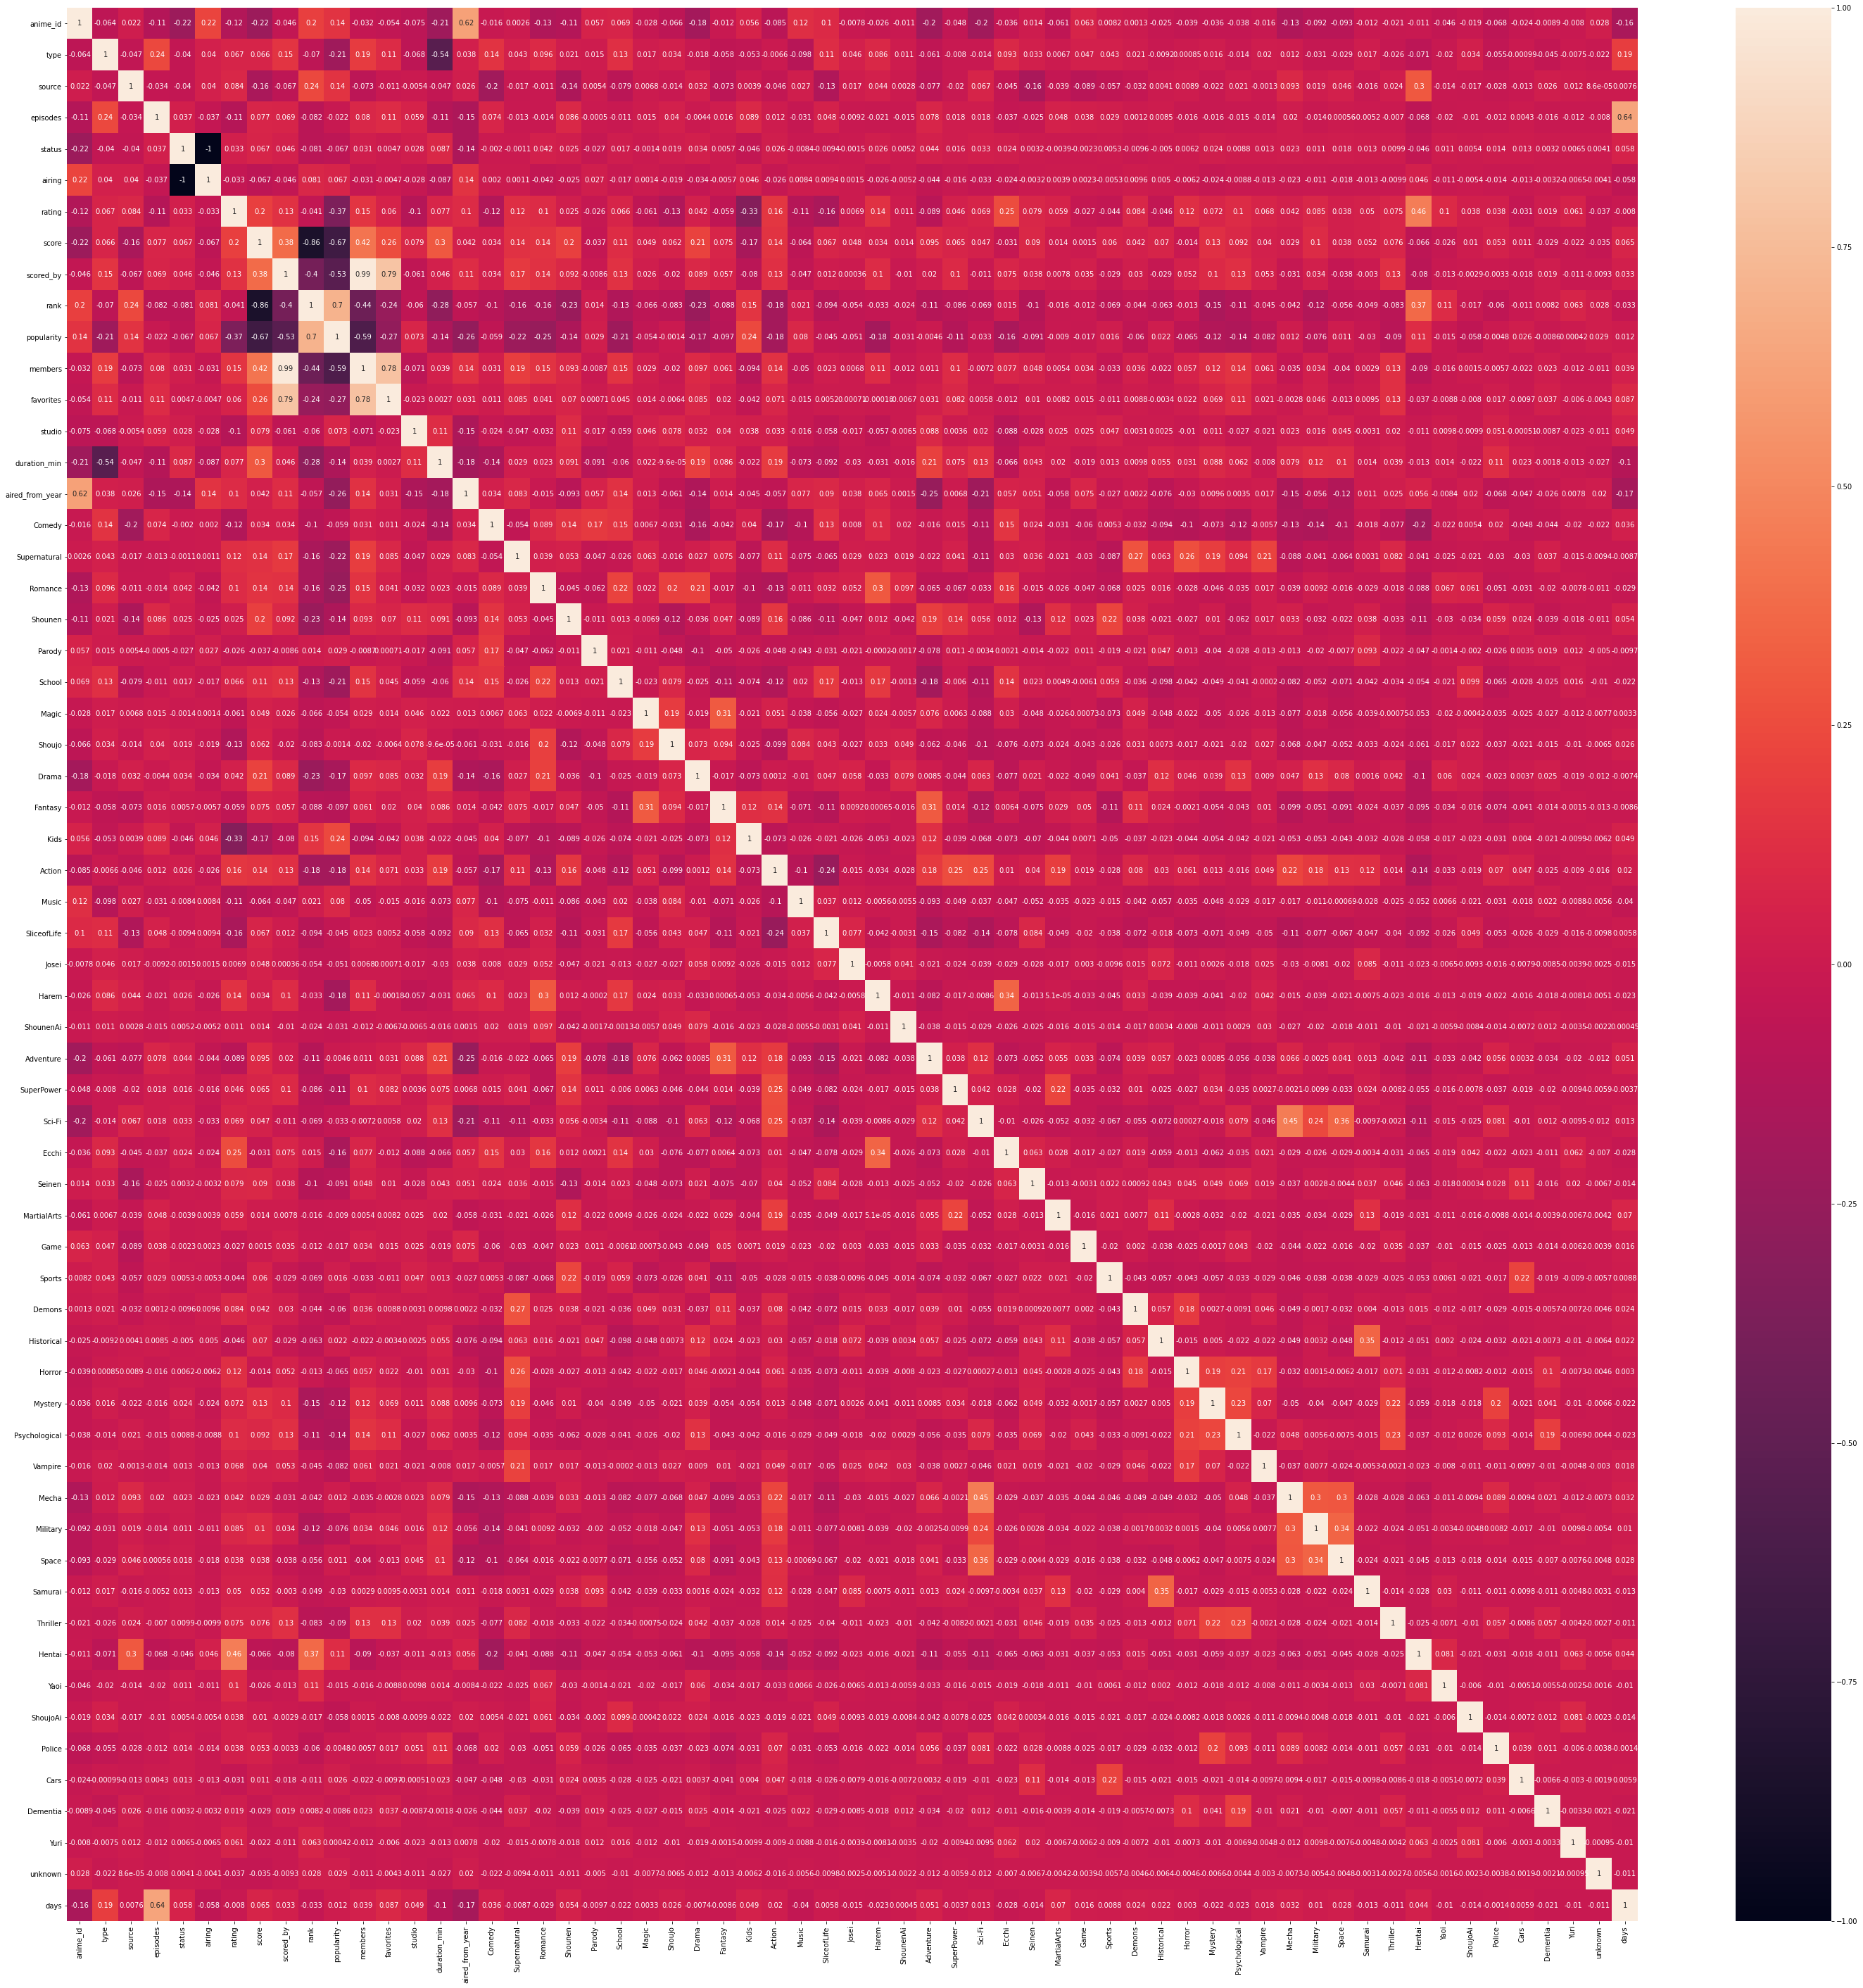

In [ ]:
corrMatrix = anime_df.corr()
sns.heatmap(corrMatrix, annot=True)

In [ ]:
max(anime_df['rank'])

5435.0

In [ ]:
max(anime_df['popularity'])

5857

In [ ]:
anime_df['score'].value_counts()

7.35    47
6.57    44
6.71    44
7.22    43
6.83    43
        ..
3.73     1
3.19     1
4.19     1
5.39     1
8.92     1
Name: score, Length: 509, dtype: int64

In [ ]:
anime_df['rank'].value_counts()

5435.0    356
3475.0      4
2138.0      4
1931.0      3
4383.0      3
         ... 
1456.0      1
2726.0      1
4699.0      1
1941.0      1
49.0        1
Name: rank, Length: 5435, dtype: int64

In [ ]:
anime_df['popularity'].value_counts()

756     3
3355    3
3676    3
224     3
1246    3
       ..
5192    1
5196    1
1102    1
5200    1
2049    1
Name: popularity, Length: 5857, dtype: int64

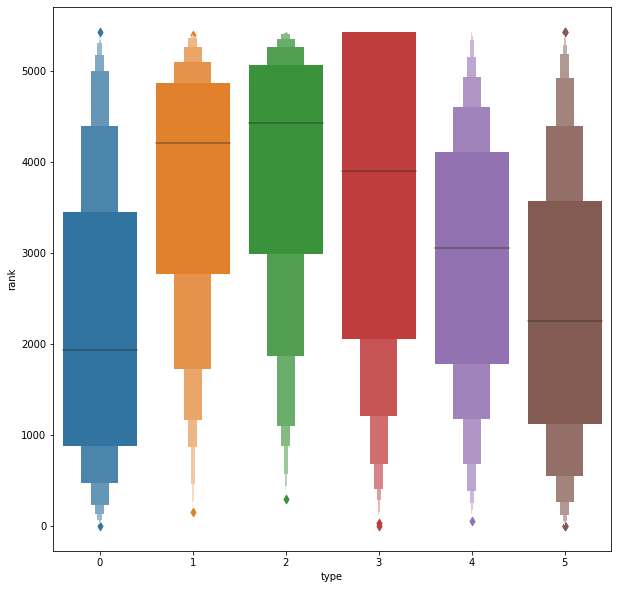

In [13]:
plt.rcParams["figure.figsize"] = (10,10)
sns.boxenplot(x='type', y='rank', data=anime_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text major ticklabel objects>)

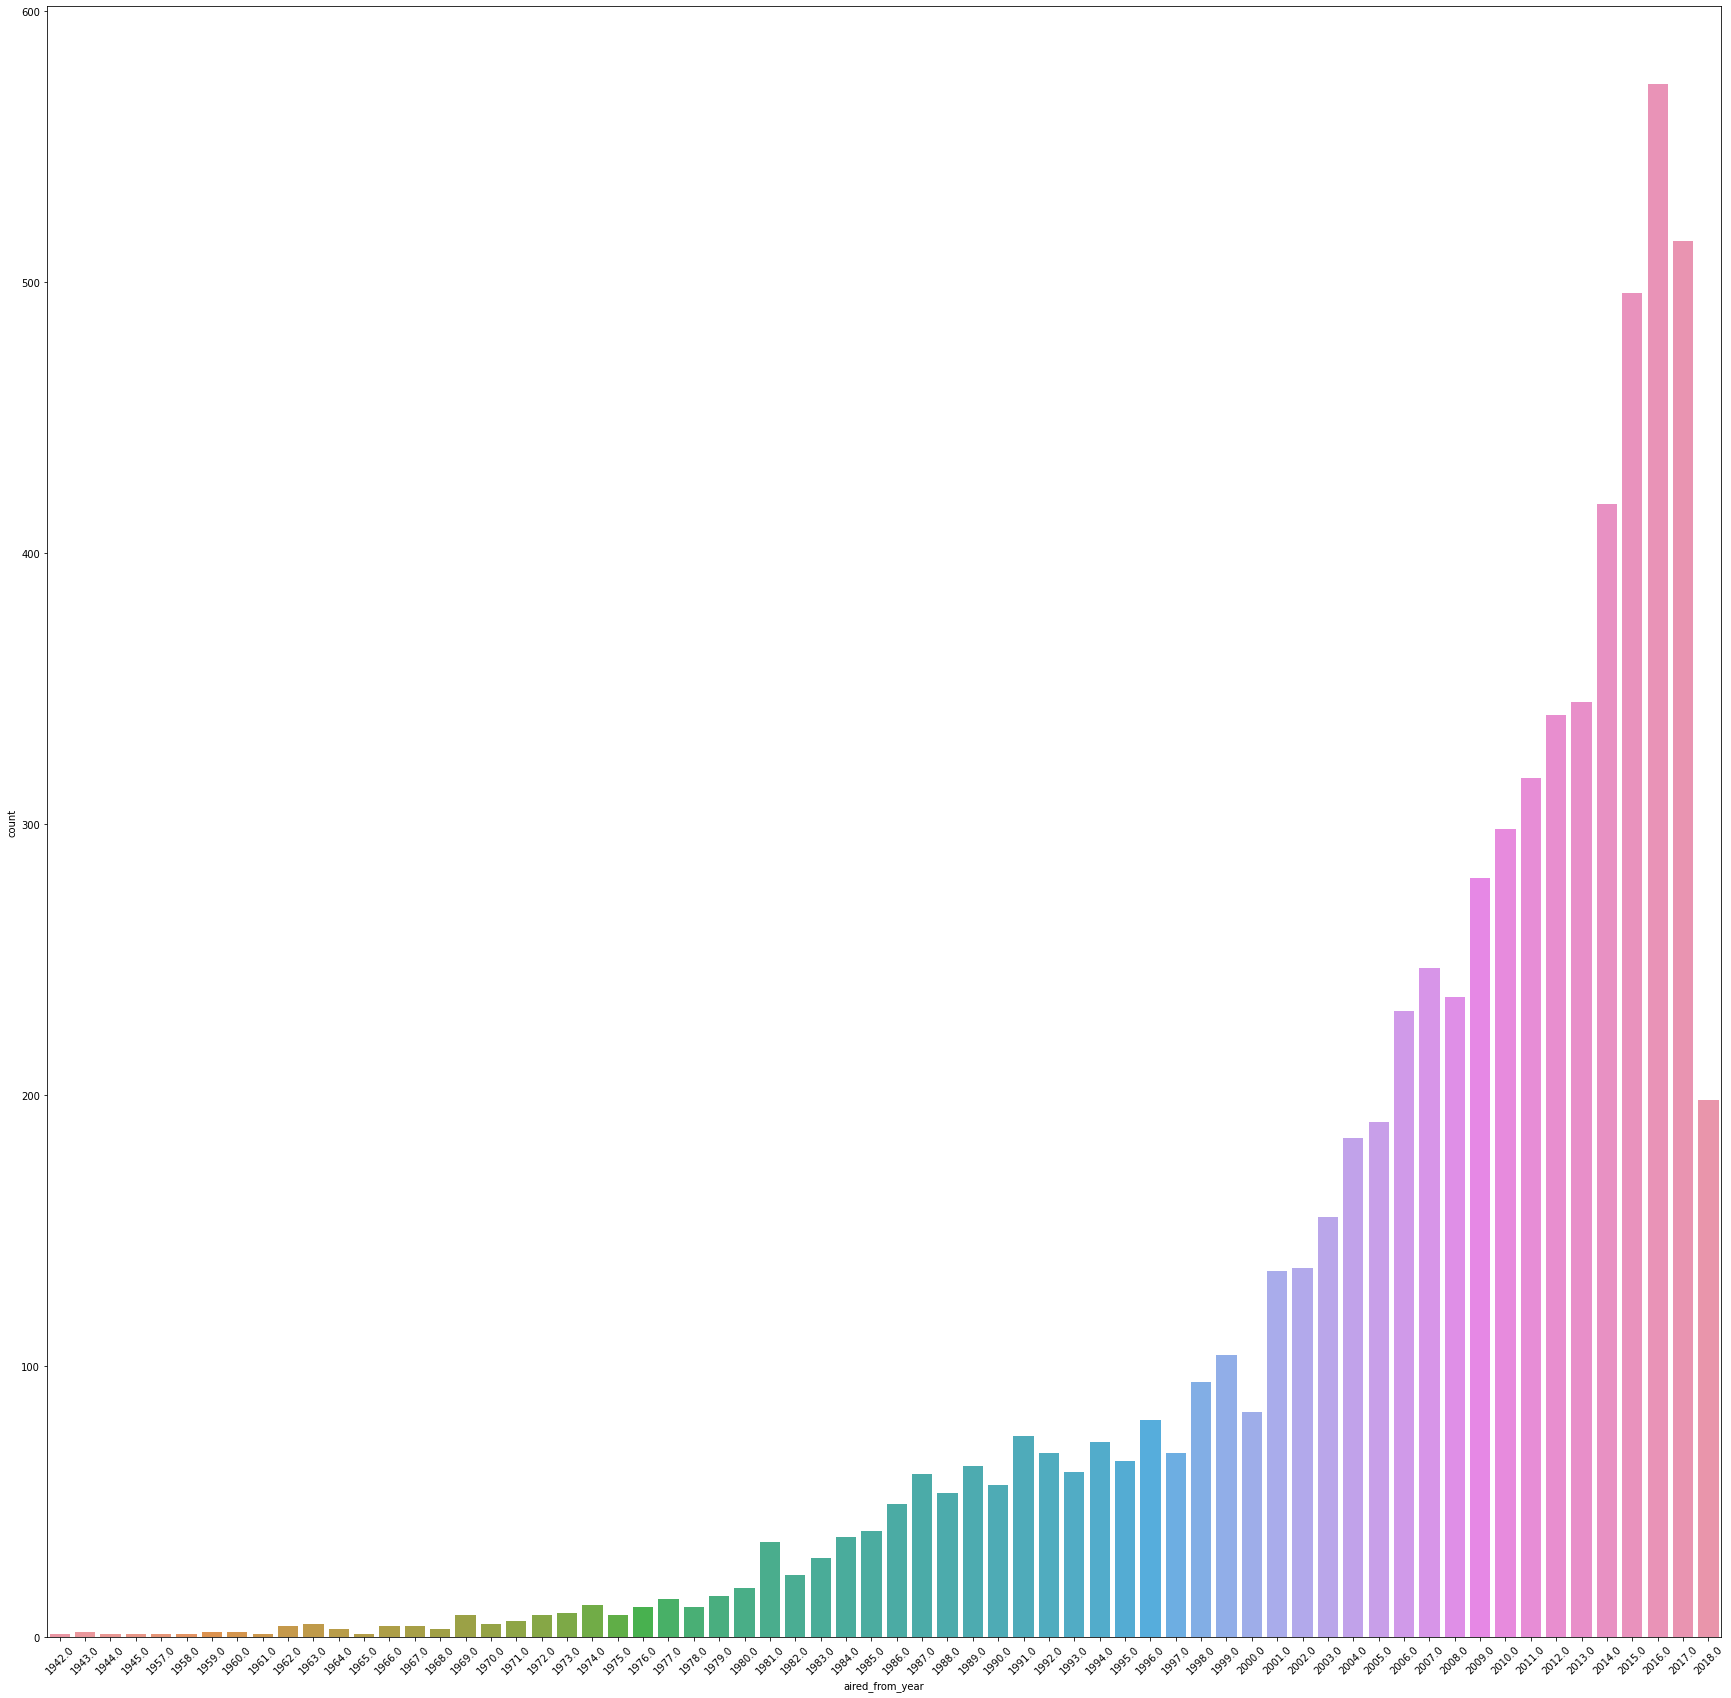

In [19]:
plt.rcParams["figure.figsize"] = (30,30)
chart = sns.countplot(x='aired_from_year', data=anime_df)
plt.xticks(rotation=45,)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174]),
 <a list of

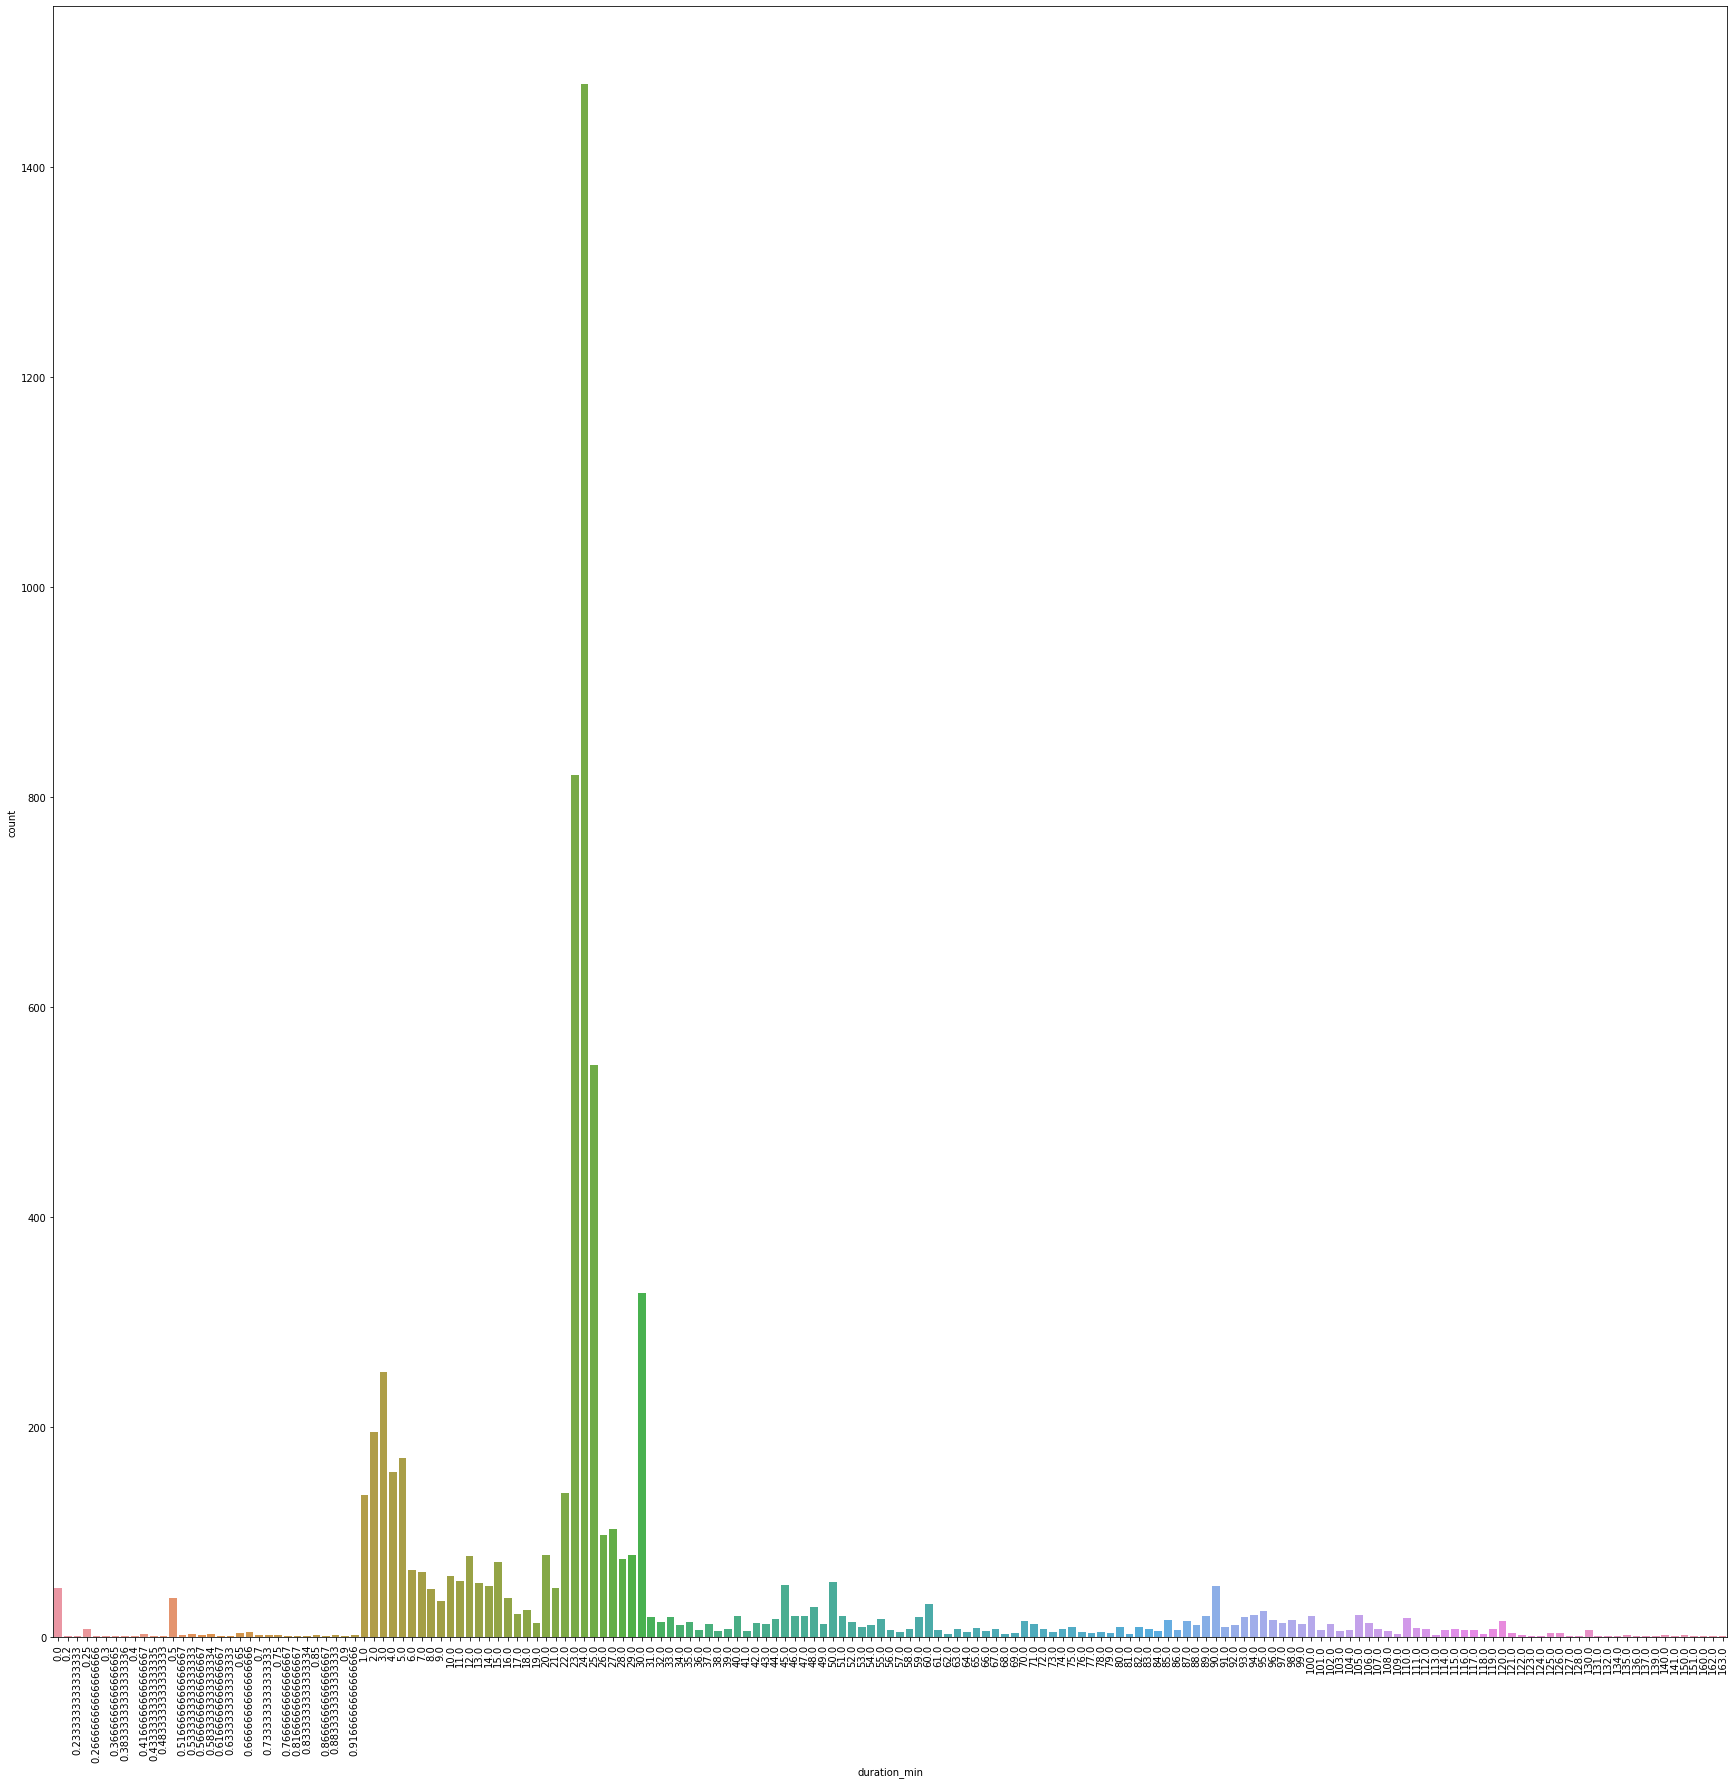

In [22]:
chart = sns.countplot(x='duration_min', data=anime_df)
plt.xticks(rotation=90)

In [27]:
anime_df[anime_df.duration_min==0.0].count()

anime_id    47
type        47
source      47
episodes    47
status      47
            ..
Cars        47
Dementia    47
Yuri        47
unknown     47
days        47
Length: 61, dtype: int64

In [42]:
anime_df[anime_df.duration_min==0.0]

,anime_id,type,source,episodes,status,airing,rating,score,scored_by,rank,popularity,members,favorites,studio,duration_min,aired_from_year,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Fantasy,Kids,Action,Music,SliceofLife,Josei,Harem,ShounenAi,Adventure,SuperPower,Sci-Fi,Ecchi,Seinen,MartialArts,Game,Sports,Demons,Historical,Horror,Mystery,Psychological,Vampire,Mecha,Military,Space,Samurai,Thriller,Hentai,Yaoi,ShoujoAi,Police,Cars,Dementia,Yuri,unknown,days
184,25441,4,6,1,1,0,3,6.01,267,4366.0,4654,1354,0,480,0.0,2014.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
358,32275,4,14,1,1,0,3,6.11,9,5186.0,5664,123,0,269,0.0,2015.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
471,34198,0,9,1,1,0,2,5.44,9,5092.0,5497,204,0,374,0.0,2017.0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
808,34151,3,6,0,1,0,3,5.94,18,5139.0,4772,1127,0,691,0.0,2017.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
878,10506,5,9,0,0,1,1,5.46,13,5298.0,5397,267,0,269,0.0,2011.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1180,33087,0,4,1,1,0,3,6.65,37,5159.0,4659,1347,1,530,0.0,2016.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1329,35914,5,10,13,1,0,1,4.25,8,4955.0,5642,130,0,145,0.0,2017.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84.0
1587,32916,4,9,5,1,0,0,3.92,12,5413.0,5751,87,0,273,0.0,2011.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,728.0
1721,36197,0,6,1,1,0,1,5.88,17,5071.0,4788,1103,0,141,0.0,2018.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1733,34944,0,6,1,1,0,1,7.91,549,566.0,2004,23983,81,94,0.0,2018.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [38]:
rating_mapping = ['G - All Ages','None',
'PG - Children',
'PG-13 - Teens 13 or older',
'R - 17+ (violence & profanity)',
'R+ - Mild Nudity',
'Rx - Hentai']

type_mapping = ['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']

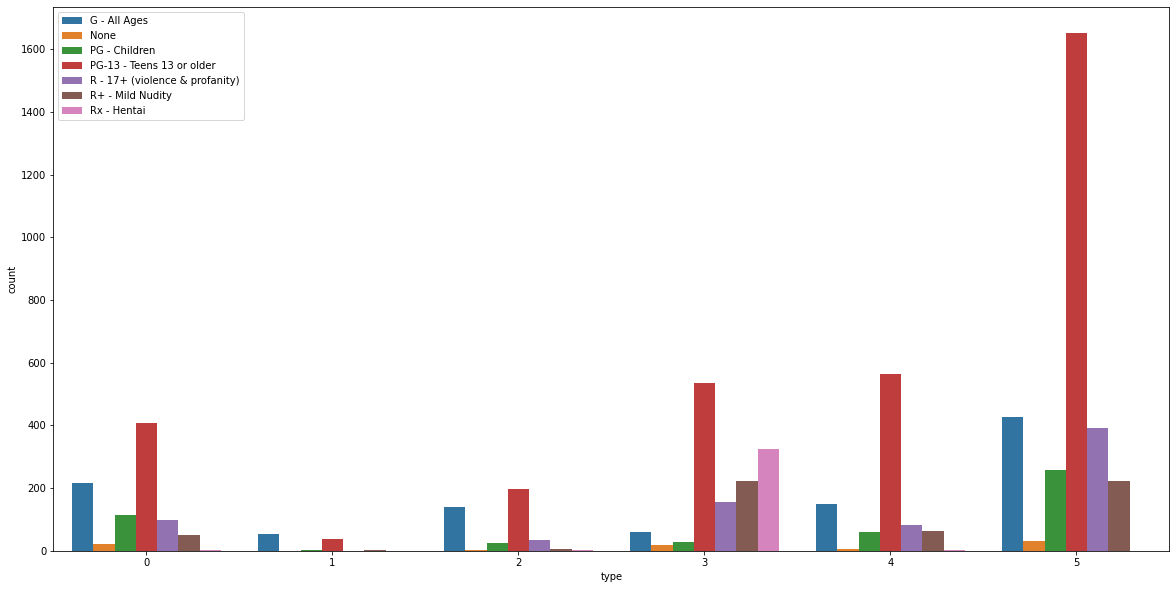

In [41]:
plt.rcParams["figure.figsize"] = (20,10)
sns.countplot(x='type', hue='rating', data=anime_df)
plt.legend(labels=rating_mapping)

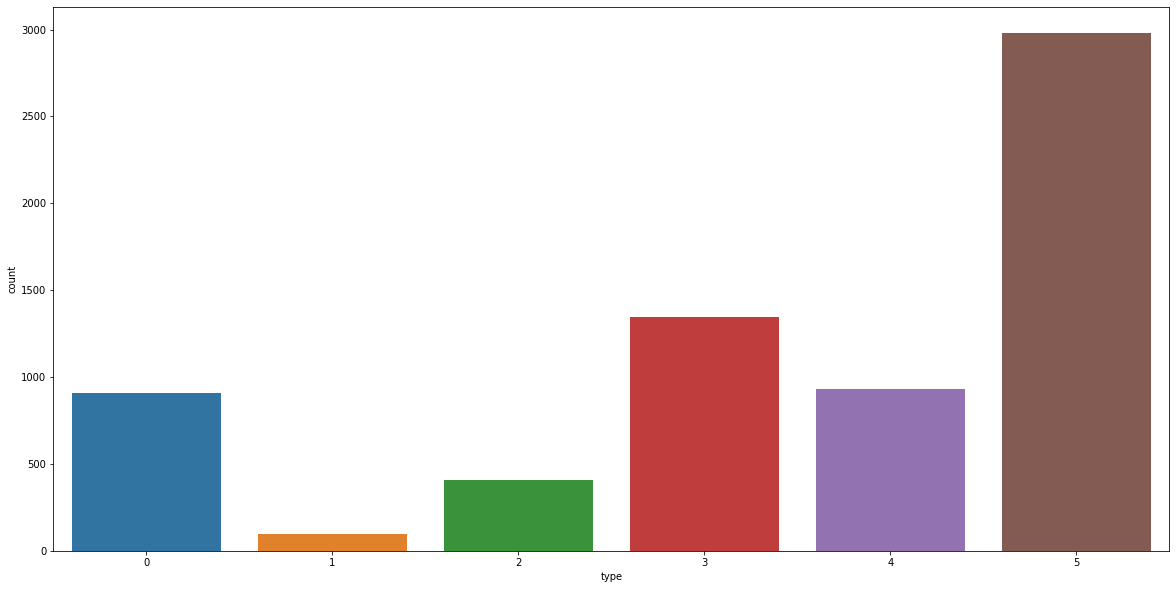

In [31]:
sns.countplot(x='type', data=anime_df)

In [32]:
anime_df[anime_df.type==0].count()

anime_id    908
type        908
source      908
episodes    908
status      908
           ... 
Cars        908
Dementia    908
Yuri        908
unknown     908
days        908
Length: 61, dtype: int64

In [33]:
anime_df[anime_df.type==4].count()

anime_id    929
type        929
source      929
episodes    929
status      929
           ... 
Cars        929
Dementia    929
Yuri        929
unknown     929
days        929
Length: 61, dtype: int64

In [43]:
anime_df.drop(anime_df[anime_df['duration_min'] == 0.0].index, inplace = True) 

In [44]:
anime_df[anime_df.duration_min==0.0].count()

anime_id    0
type        0
source      0
episodes    0
status      0
           ..
Cars        0
Dementia    0
Yuri        0
unknown     0
days        0
Length: 61, dtype: int64

In [45]:
anime_df.to_csv("final_cleaned_model_ready_ver3.csv", index = False)